In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
print(os.listdir('.'))

['.ipynb_checkpoints', 'sample_submission_LMg97w5.csv', 'test.csv', 'train.csv', 'Untitled.ipynb']


In [5]:
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_soln =  pd.read_csv("sample_submission_LMg97w5.csv")


In [6]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [7]:
train.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
9519,1001449,P00184842,M,36-45,20,A,1,1,5,6.0,NaN,1793
60710,1003391,P00119142,M,18-25,4,A,0,0,3,4.0,12.0,13715
222414,1004277,P00152242,M,36-45,16,A,0,0,14,16.0,NaN,11501
462284,1005168,P00034842,M,36-45,7,C,1,1,5,14.0,NaN,8699
30485,1004651,P00035442,F,46-50,0,B,4+,0,7,NaN,NaN,16475


In [8]:
test.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
98307,1001396,P00250242,F,26-35,12,A,4+,1,5,NaN,NaN
196046,1002041,P00216542,F,26-35,20,B,4+,0,8,NaN,NaN
227151,1001988,P00233442,F,26-35,1,B,2,0,1,2.0,15.0
182376,1004933,P00260142,M,26-35,15,B,3,0,5,14.0,NaN
113096,1000264,P00118442,M,36-45,0,B,1,1,1,2.0,NaN


In [10]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
train.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
# imputing missing values

train['Product_Category_2'].fillna(train['Product_Category_2'].mean(), inplace = True)
train['Product_Category_3'].fillna(train['Product_Category_3'].mean(), inplace = True)

train.isnull().sum().sum()

0

In [14]:
# finding the maximum purchase in both male and female
train.groupby(train.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [17]:
# finding the minimum purchase in both male and female
train.groupby(train.Gender).Purchase.min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

In [18]:
# checking dependency of gender on purchase

x = train[['Gender', 'Purchase']].groupby('Gender').mean()
x = pd.DataFrame(x)
x

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [19]:
# checing the dependency of age attribute with purchasing power

y = train[['Age', 'Purchase']].groupby('Age').mean()
y = pd.DataFrame(y)
y

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [20]:
# checking the dependency of cities where custoer live with the purchasing power

train[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


# Data Visualization

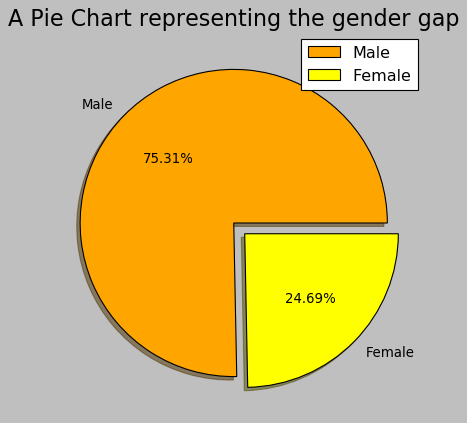

In [32]:
# pie chart 

size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('_classic_test')
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

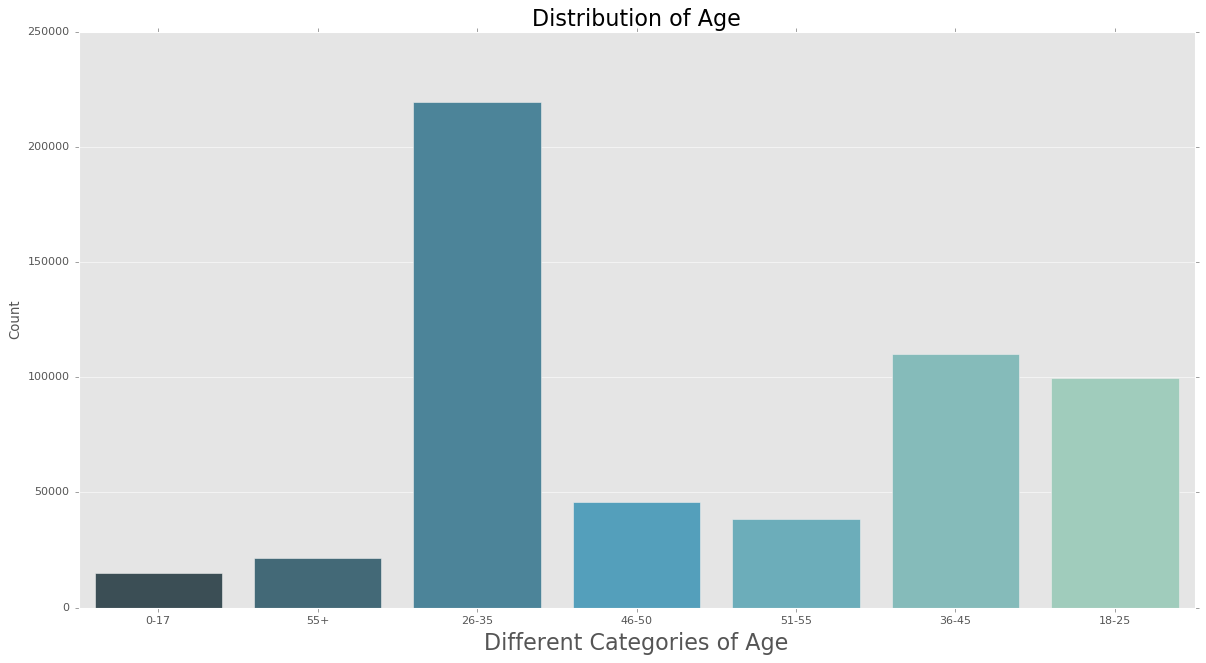

In [36]:
# visualizing the age of customers

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.countplot(train['Age'], palette = 'GnBu_d')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()


In [23]:
 print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


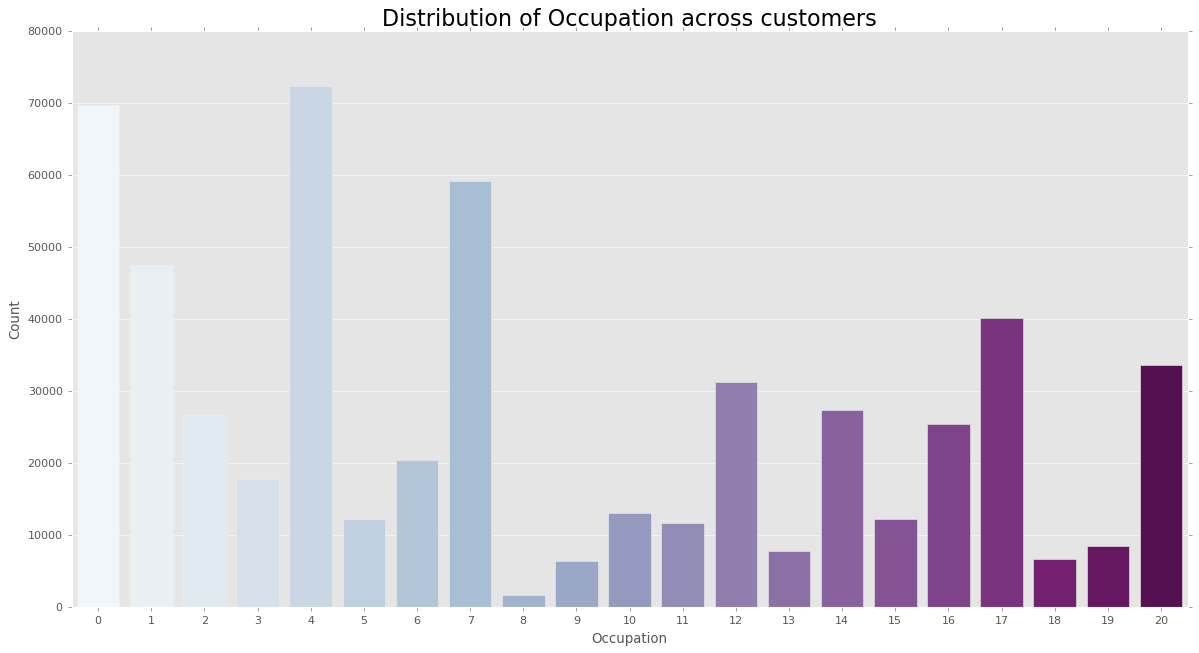

In [34]:
# visualizing the occupation of customers

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.countplot(train['Occupation'], palette = 'BuPu')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

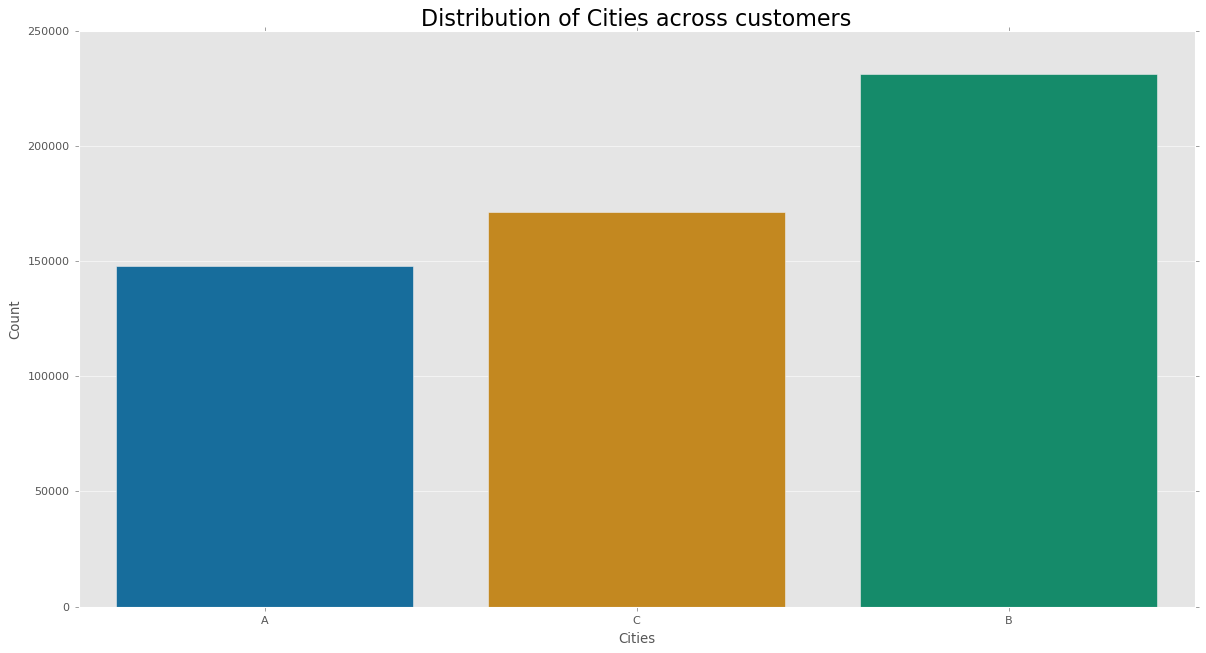

In [35]:
# visulaizing the cities the customers are from

sns.countplot(train['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

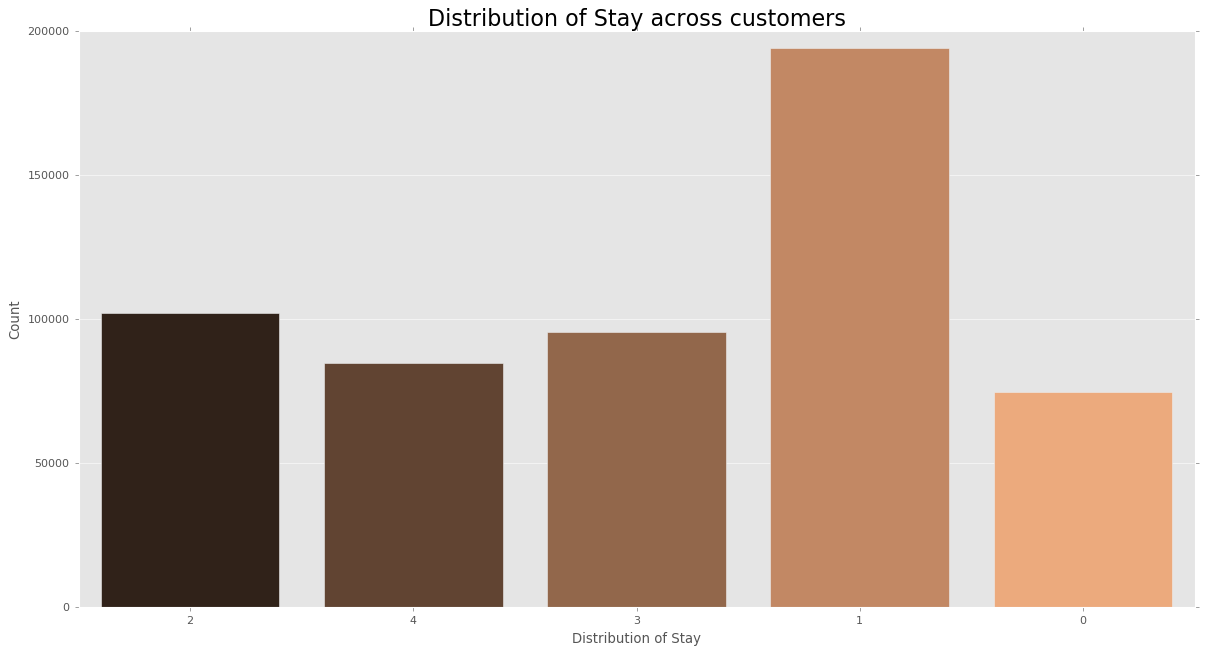

In [38]:
# visualizing the stay in current years

# we need to label the 4+ to 5 to visualize the stay of customers in a city
train['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

sns.countplot(train['Stay_In_Current_City_Years'], palette = 'copper')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

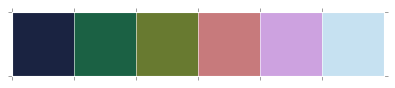

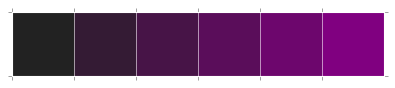

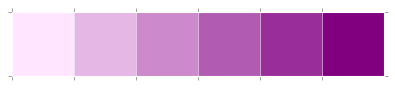

In [42]:
sns.palplot(sns.color_palette("cubehelix"))
sns.palplot(sns.dark_palette("purple"))
sns.palplot(sns.light_palette("purple"))


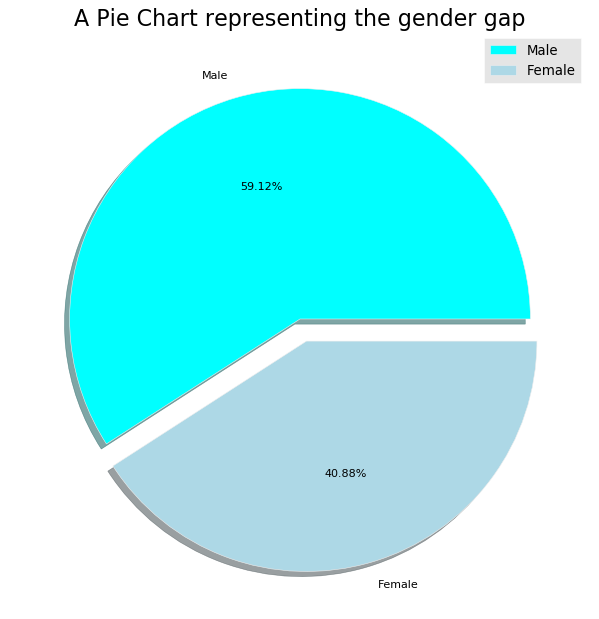

In [43]:
# pie chart 

size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

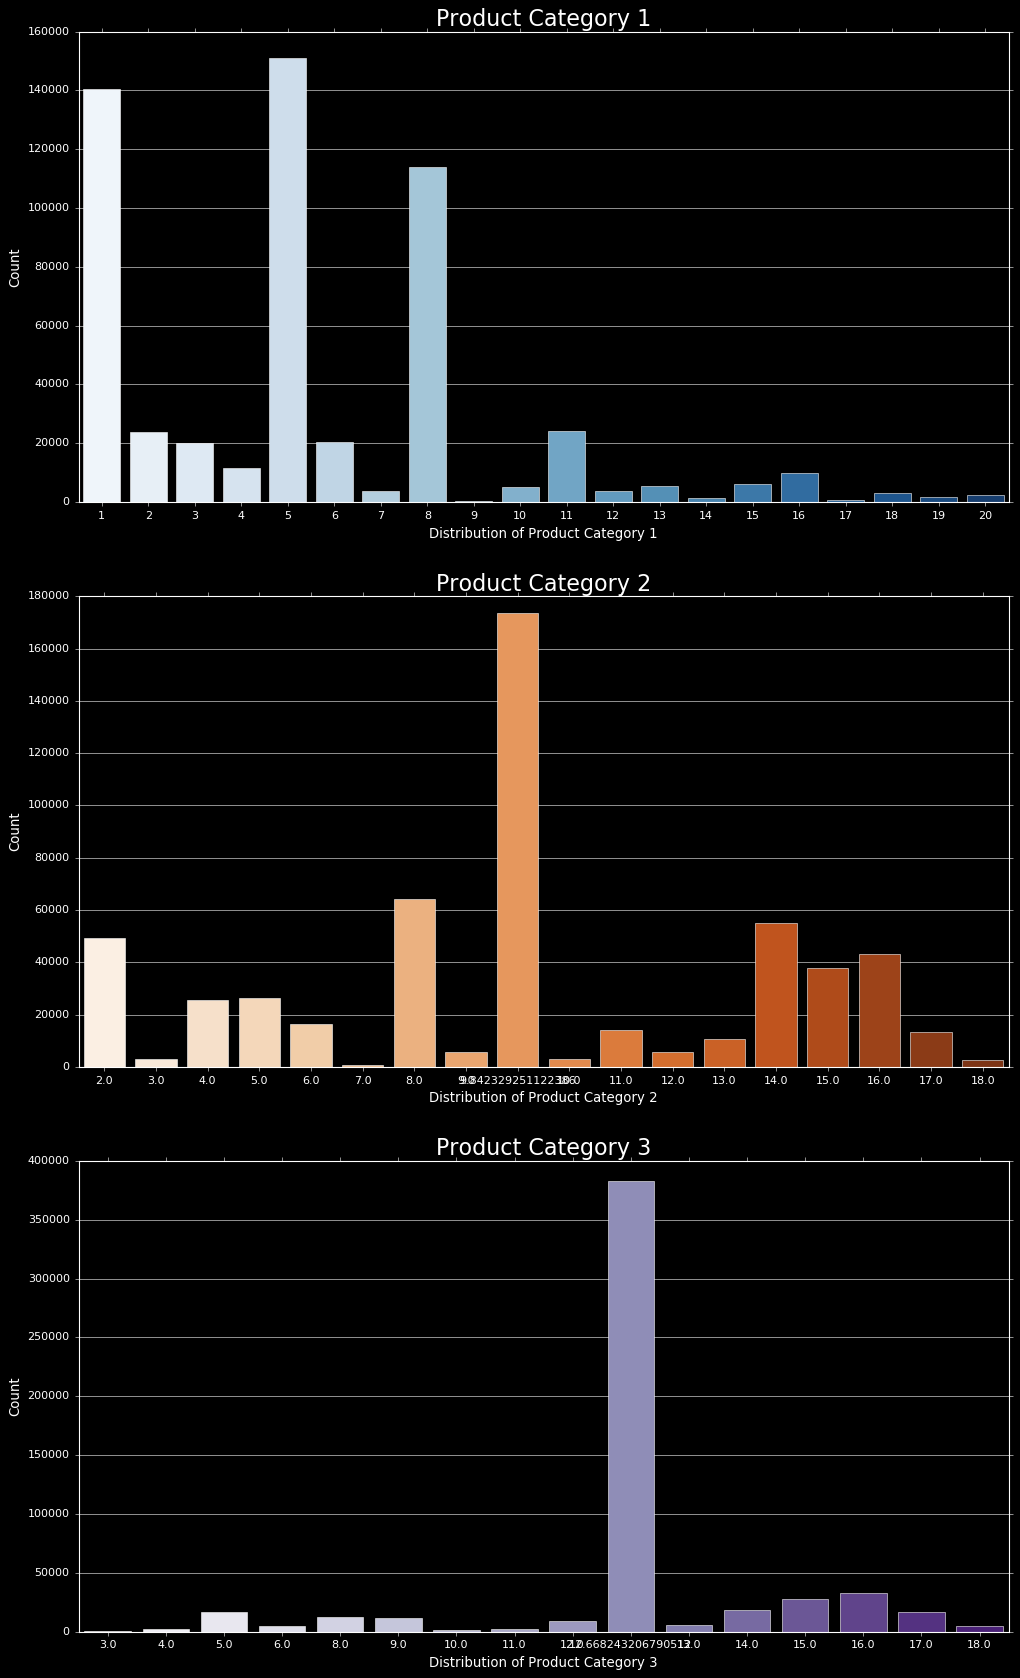

In [44]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
sns.countplot(train['Product_Category_1'], palette = 'Blues')
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(3, 1, 2)
sns.countplot(train['Product_Category_2'], palette = 'Oranges')
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(3, 1, 3)
sns.countplot(train['Product_Category_3'], palette = 'Purples')
plt.title('Product Category 3', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')

plt.show()

The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


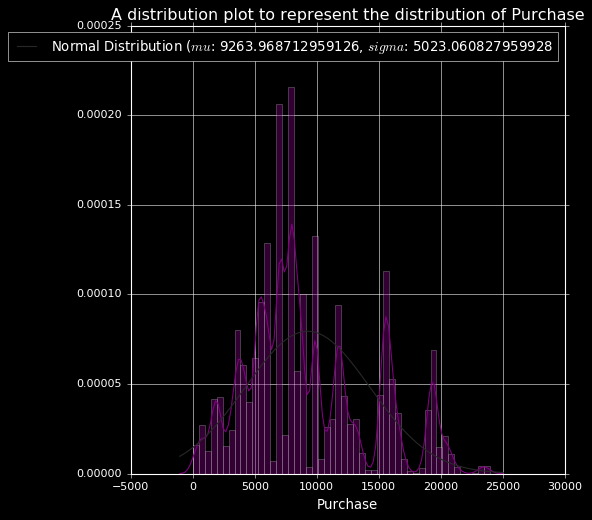

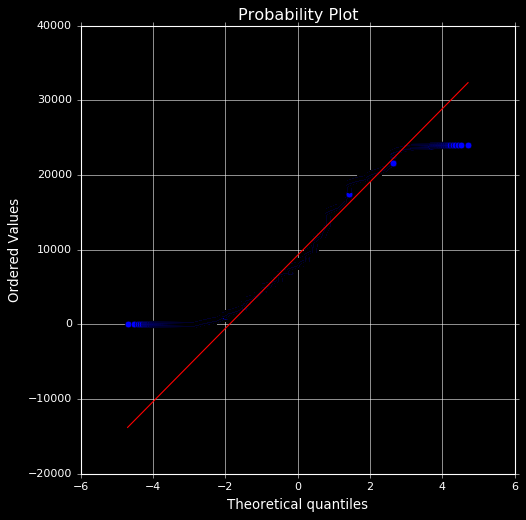

In [46]:
# visualizing the purchase attribute which is our target variable

import warnings
warnings.filterwarnings('ignore')

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(train['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(train['Purchase'], plot = plt)
plt.show()




# Data Preprocessing

In [47]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = train['User_ID']
Product_ID = train['Product_ID']

train = train.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
train.shape

(550068, 10)

In [48]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Gender'] = le.fit_transform(train['Gender'])
train['City_Category'] = le.fit_transform(train['City_Category'])
train['Age'] = le.fit_transform(train['Age'])

In [49]:
# splitting the data into dependent and independents sets

y = train['Purchase']

# now removing the purchase column from the dataset
train = train.drop(['Purchase'], axis = 1)

x = train

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 9)
Shape of y:  (550068,)


In [50]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 9)
Shape of x_test:  (165021, 9)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [53]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modelling

# 1.Ridge regression

In [54]:

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4698.056053972827
R2 Score: 0.12937881032791076


# 2. Elastic Net Regression

In [55]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4731.862287697157
R2 Score: 0.116804112248034


# 3. Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4698.062880210025
R2 Score: 0.12937628031507153


# 4. Gradient Boosting Regression


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2927.6566049233566
R2 Score: 0.6619093848524221


# Comparison of R2 Score



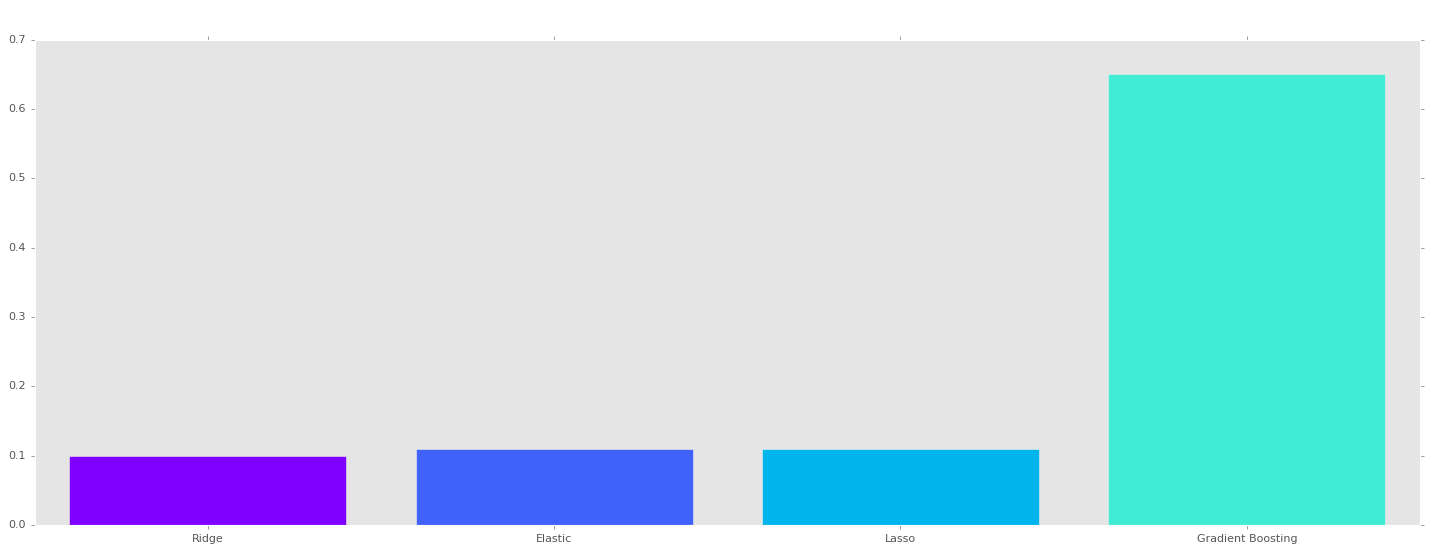

In [58]:
r2_score = np.array([0.1, 0.11, 0.11, 0.65])
labels = np.array(['Ridge', 'Elastic', 'Lasso', 'Gradient Boosting'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

# Comparison of RMSE Score



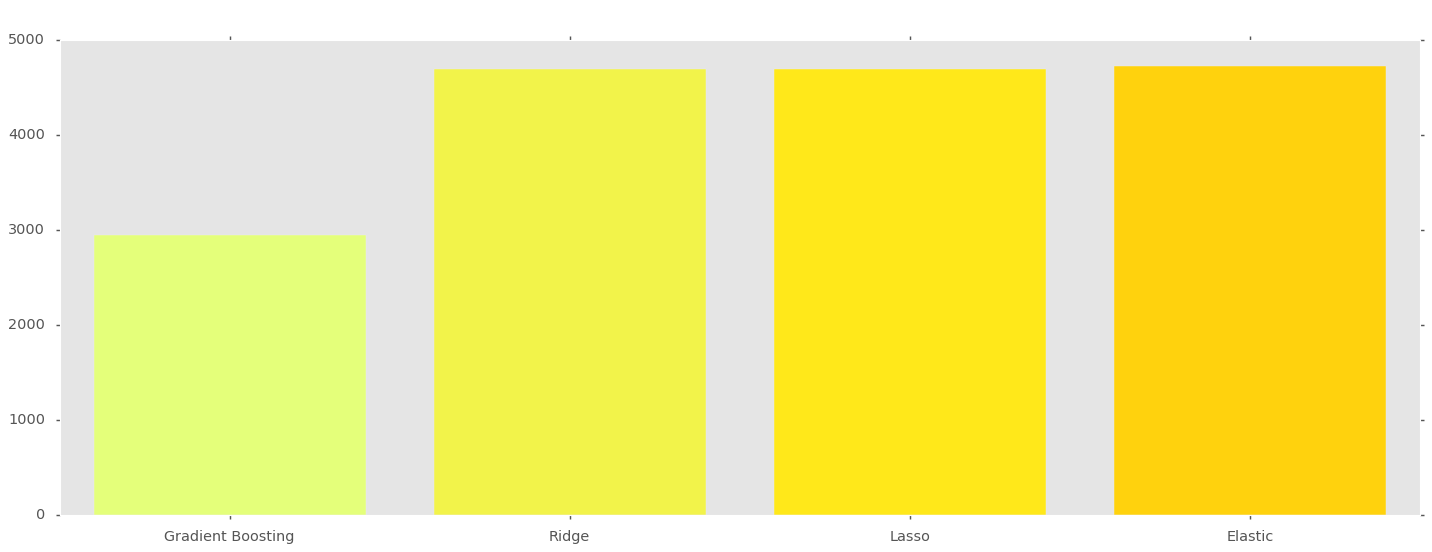

In [59]:
r2_score = np.array([4695, 4723, 4695, 2945])
labels = np.array(['Ridge', 'Elastic', 'Lasso', 'Gradient Boosting'])
indices = np.argsort(r2_score)
color = plt.cm.Wistia(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()
